## Self Driving Car: Finding Lane Lines on the road

### Import Packages

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from utils import *
import cv2
%matplotlib inline

### Initial images

In [25]:
test_images = os.listdir('test_images/')

In [26]:
test_images

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

In [27]:
initial_images = []
for image_path in test_images:
    image_path = 'test_images/' + image_path
    image =  mpimg.imread(image_path)
    initial_images.append(image)

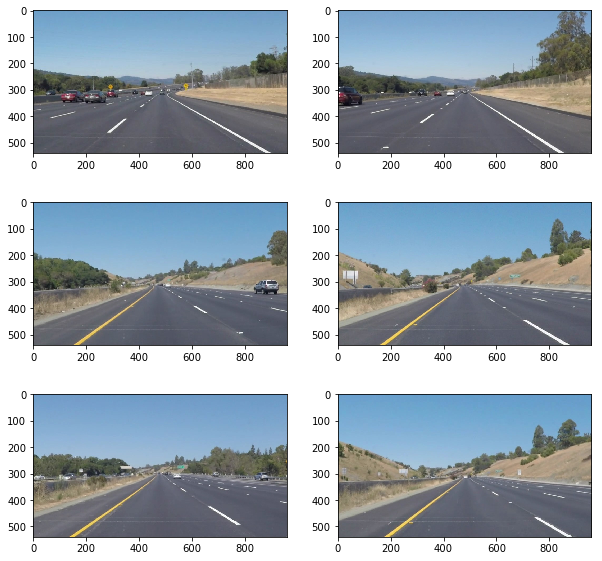

In [28]:
w=20
h=5
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
for i in range(1, len(initial_images) + 1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(3, 2, i)
    plt.imshow(initial_images[i-1])
plt.show()

### Grayscaling

In [29]:
initial_images = []
for image_path in test_images:
    image_path = 'test_images/' + image_path
    image =  mpimg.imread(image_path)
    image = grayscale(image)
    initial_images.append(image)

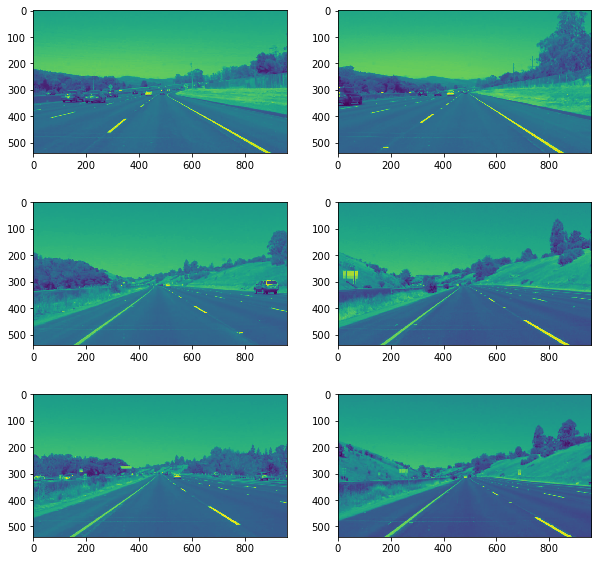

In [30]:
w=20
h=5
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
for i in range(1, len(initial_images) + 1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(3, 2, i)
    plt.imshow(initial_images[i-1])
plt.show()

### Gaussian blur

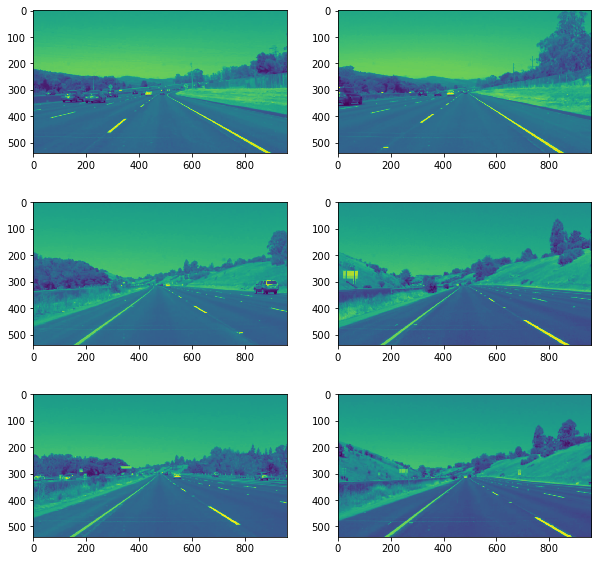

In [31]:
initial_images = []
for image_path in test_images:
    image_path = 'test_images/' + image_path
    image =  mpimg.imread(image_path)
    image = grayscale(image)
    image = gaussian_blur(image, 3)
    initial_images.append(image)
    
w=20
h=5
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
for i in range(1, len(initial_images) + 1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(3, 2, i)
    plt.imshow(initial_images[i-1])
plt.show()

### Canny edge detection

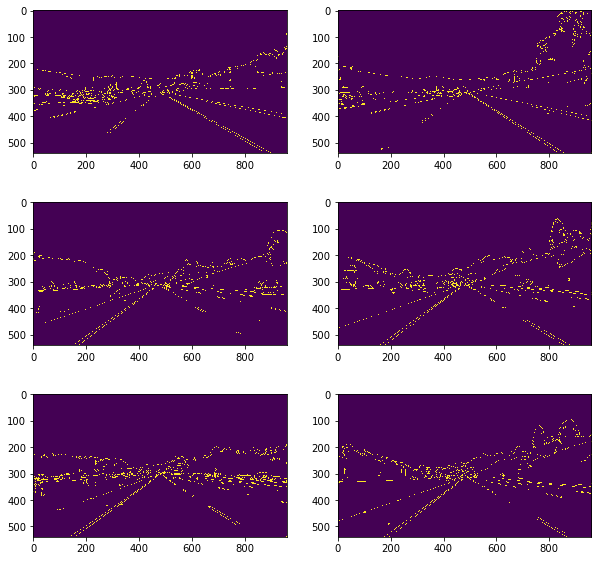

In [32]:
initial_images = []
for image_path in test_images:
    image_path = 'test_images/' + image_path
    img =  mpimg.imread(image_path)
    img = grayscale(img)
    img = gaussian_blur(img, 3)
    img = canny(img, 50, 150)
    initial_images.append(img)
    
w=20
h=5
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
for i in range(1, len(initial_images) + 1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(3, 2, i)
    plt.imshow(initial_images[i-1])
plt.show()

### Detect lines

In [33]:
def detect_lines(image):
    '''
        Detect lane lines on a road image.
    '''
    #vertices
    vertices = np.array([[0, 580], [960, 580], [500, 320], [450, 320]])
    
    # gaussian blur parameters
    kernel = 3
    
    # canny parameters
    low_threshold = 50
    high_threshold = 150
    
    # hough parameters
    rho=2
    thetha = np.pi/180
    min_line_len = 100
    max_line_gap = 150
    threshold=50

    # make a copy
    img = np.copy(image)
    # apply grayscale transform and gaussain blur
    img = grayscale(img)
    img = gaussian_blur(img, kernel)
    img = canny(img, low_threshold, high_threshold)
    img_roi = region_of_interest(img, np.int32([vertices]))
    line_img = hough_lines(img_roi, rho, thetha, threshold, min_line_len, max_line_gap) 
    img = weighted_img(line_img, image, α=0.8, β=1., γ=0.)
    
    return img
    
    


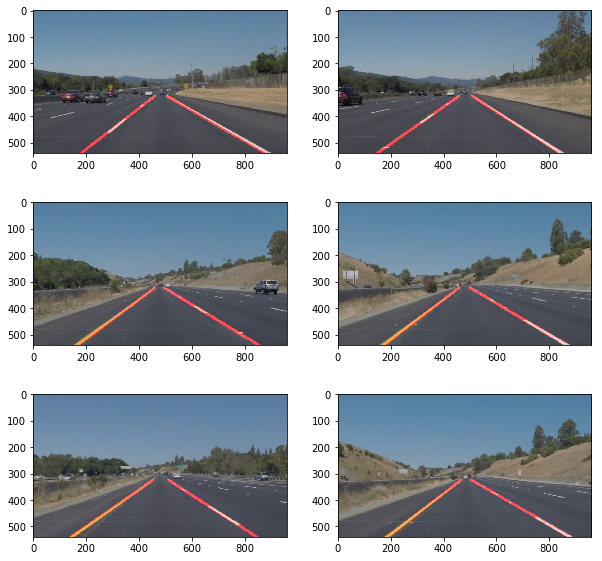

In [34]:
final_image = []
for image_path in test_images:
    image_path = 'test_images/' + image_path
    image =  mpimg.imread(image_path)
    img = detect_lines(image)
    final_image.append(img)
    
w=20
h=5
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
for i in range(1, len(final_image) + 1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(3, 2, i)
    plt.imshow(final_image[i-1])
plt.show()


### Video

In [35]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [36]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    result = detect_lines(image)
    # you should return the final output (image where lines are drawn on lanes)

    return result

In [37]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,4)
#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


 99%|█████████▉| 100/101 [00:01<00:00, 65.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 1.18 s, sys: 211 ms, total: 1.39 s
Wall time: 2.11 s


In [38]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [39]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


 99%|█████████▉| 125/126 [00:02<00:00, 51.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 1.57 s, sys: 259 ms, total: 1.83 s
Wall time: 2.72 s


In [40]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))